# Figure S10. Extended disease heritability analyses of variant-level functional annotations derived from ColocBoost.

- **S10a**. Correlation matrix of five functional annotations based on the MaxVCP scores from ColocBoost.
- **S10b**. Heritability enrichment and standardized effect sizes, meta-analyzed across all, brain-related and blood-related traits, conditional on 97 baseline-LD v2.2 annotations of the 5 versions of xQTL MaxPPH derived from HyPrColoc. 
- **S10c**. Standardized effect sizes, conditional on the 97 baseline-LD v2.2 annotations + MaxVCP-xQTL and CoS‐xQTL annotations (joint $\tau^*$). 
- **S10d**. Standardized effect sizes, conditional on the 97 baseline-LD v2.2 annotations + MaxVCP-xQTL and binarized MaxVCP-xQTL scores at different binarization thresholds (joint $\tau^*$). 
- **S10e**. Heritability enrichment and standardized effect sizes (marginal $\tau^*$ and joint $\tau^*$) of MaxVCP-xQTL against MaxPIP annotation from SuSiE fine-mapping analysis.
- **S10f**. EOO analysis of MaxVCP-xQTL in the disease fine-mapped variants (PIP>0.95) from 94 UK Biobank traits and 930 Million Veteran Program (MVP) traits.
- **S10g**. Heritability enrichment and standardized effect sizes (marginal $\tau^*$ and joint $\tau^*$) of MaxVCP-xQTL annotations for cell‐type‐specific variants and cell‐type‐shared variants. Error bars denote 95% confidence intervals.

Asterisk denotes FDR<5% is computed by Bonferroni correction of the p-values for the number of annotations tested in the S-LDSC analysis.

## Figure S10a
Correlation matrix of five functional annotations based on the MaxVCP scores from ColocBoost.

In [3]:
correlation <- readRDS("Figure_S10a.rds")
library(ggplot2)
library(reshape2)
corr_melt <- melt(correlation)
p1 <- ggplot(corr_melt, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "white", high = "#E41C1C", mid = "#FEC661", 
                       midpoint = 0.5, limit = c(0, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1),
        axis.text.y = element_text(size = 12),
        panel.grid = element_blank()) +
  coord_fixed() +
  geom_text(aes(Var1, Var2, label = round(value, 2)), color = "black", size = 4) +
  labs(title = "", x = "", y = "")


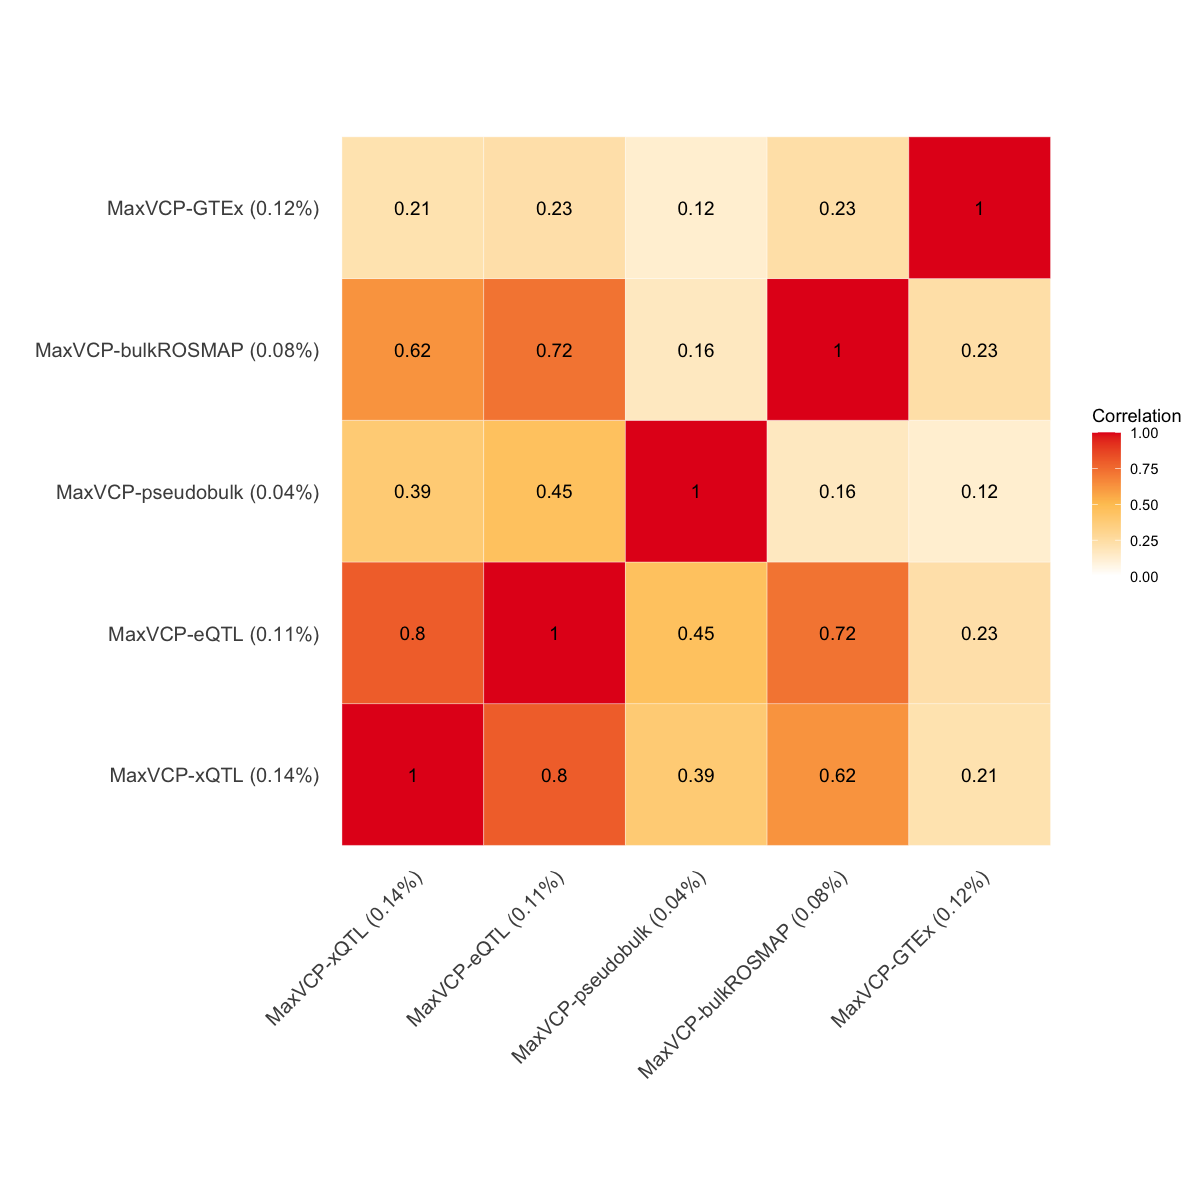

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)
p1

## Figure S10b
Heritability enrichment and standardized effect sizes, meta-analyzed across all, brain-related and blood-related traits, conditional on 97 baseline-LD v2.2 annotations of the 5 versions of xQTL MaxPPH derived from HyPrColoc. 

In [5]:
create_plot <- function(context){
  if (context == "marginal tau*") {
    y.show <- expression(paste("Marginal ", tau, "*"))
  } else {
    y.show = context
  }
  p <- ggplot(data[data$Context == context, ], aes(x = Disease, y = Value, fill = Disease)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
    scale_fill_brewer(palette = "Set1") +
    theme_minimal(base_size = 15) +
    labs(
      title = "",
      x = "",
      y = y.show,
      fill = "Annotation"
    ) +
    ylim(ylim_values[[context]])
  if (context == "marginal tau*") {
    p <- p + geom_text(data = subset(data, Context == "marginal tau*" & (P <= 0.05/6) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else {
    p <- p + geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 0.7)  + 
      geom_text(data = subset(data, Context == "Enrichment" & (P <= 0.05/6) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  }
  if (context == "Enrichment"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_text(size = 15),
      axis.text.x = element_text(size = 15),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else {
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_text(size = 15),
      axis.title.y = element_text(margin = margin(r = -2)),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  }
  return(p)
}

In [14]:
data <- readRDS("Figure_S10b.rds")
library(ggplot2)
library(ggforce)
library(ggsci)
sd <- 1.96
ylim_values <- list(
  "marginal tau*" = c(-0.1, 1.1),
  "Enrichment" = c(-1, 25)
)
plot_single_tau <- create_plot("marginal tau*")
plot_enrichment <- create_plot("Enrichment")

library(ggpubr)
pp = ggarrange(plot_enrichment, plot_single_tau, 
               ncol = 1, nrow = 2, 
               heights = c(0.5,0.5))

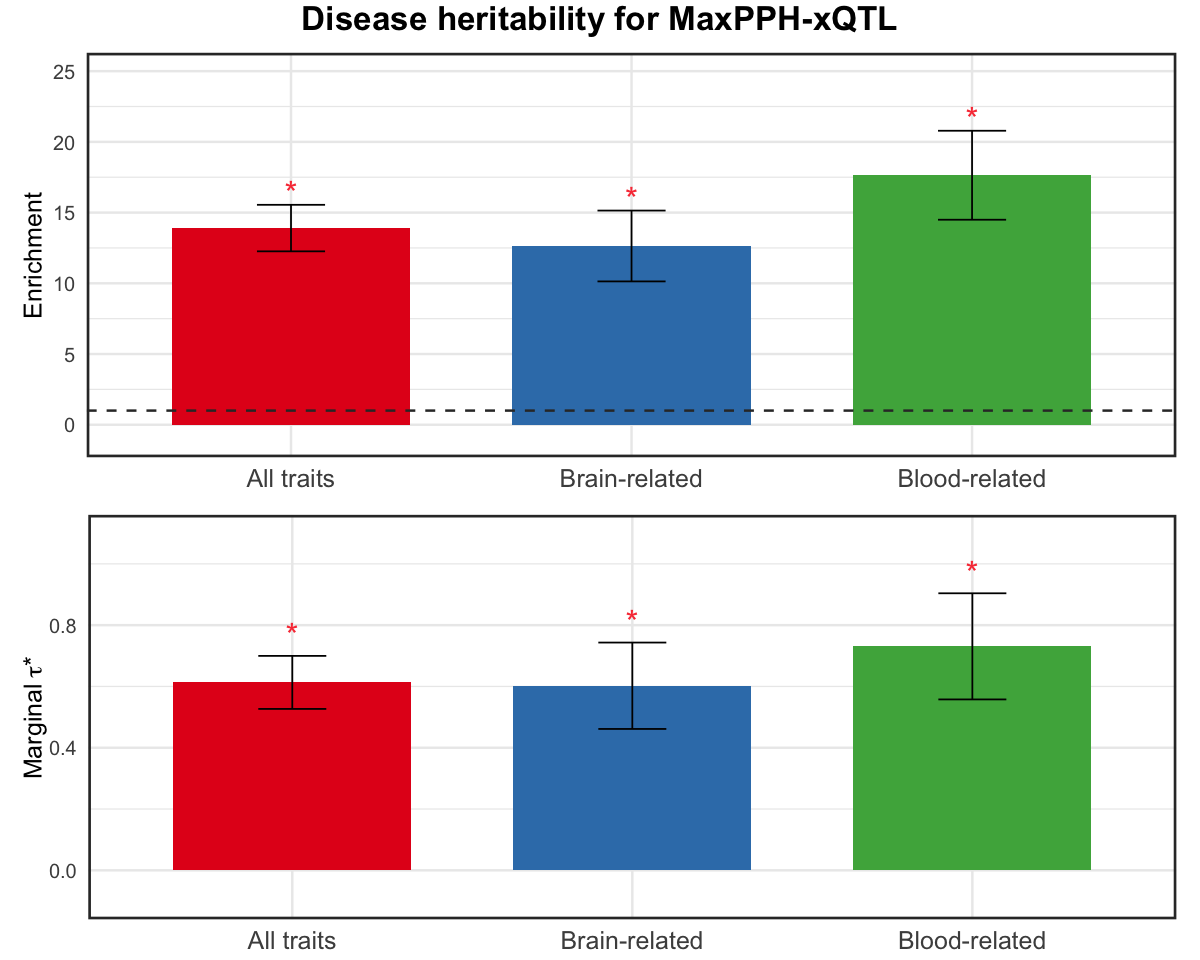

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8)
annotate_figure(pp,
               top = text_grob("Disease heritability for MaxPPH-xQTL", face = "bold", size = 20))

## Figure S10c
Standardized effect sizes, conditional on the 97 baseline-LD v2.2 annotations + MaxVCP-xQTL and CoS‐xQTL annotations (joint $\tau^*$). 

In [16]:
data <- readRDS("Figure_S10c.rds")
color <- c("#BDBDBD", "#969696", "#fc8d62", "#8da0cb", "#66c2a5")
ylim_values <- list(
  "joint tau*" = c(-0.1, 1)
)
context <- "joint tau*"
y.show <- expression(paste("Joint ", tau, "*"))
p <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("CoS-xQTL" = color[2], 
                               "MaxVCP-xQTL" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 8) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 15),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )


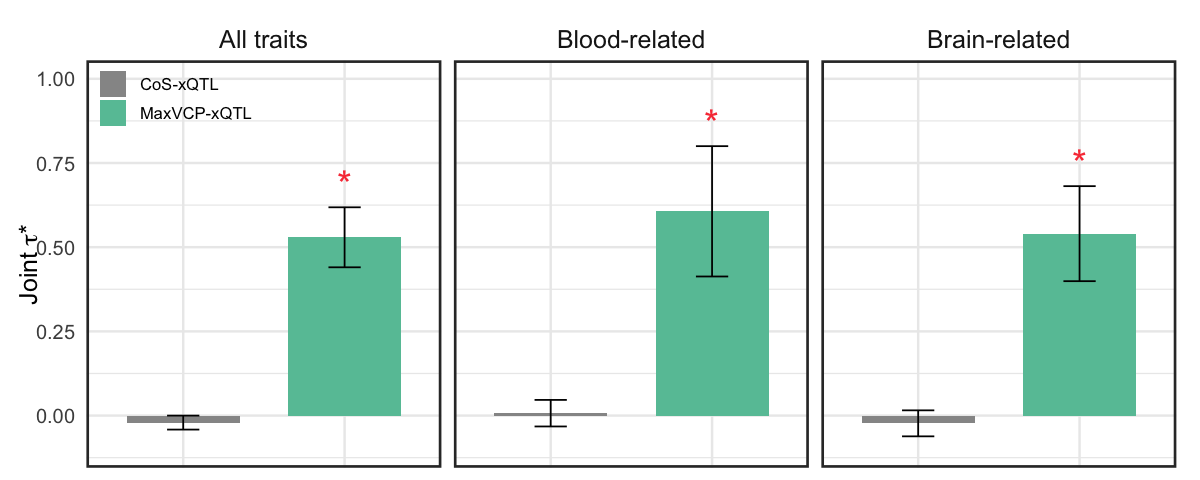

In [19]:
options(repr.plot.width = 10, repr.plot.height = 4)
p

## Figure S10d
Standardized effect sizes, conditional on the 97 baseline-LD v2.2 annotations + MaxVCP-xQTL and binarized MaxVCP-xQTL scores at different binarization thresholds (joint $\tau^*$). 

In [22]:
sd <- 1.96
color <- c("#BDBDBD", "grey40", "#fc8d62", "#8da0cb", "#66c2a5")
ylim_values <- list(
  "joint tau*" = c(-0.1, 1)
)
context <- "joint tau*"
y.show <- expression(paste("Joint ", tau, "*"))
data <- readRDS("Figure_S10d_05.rds")
p05 <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("MaxVCP>0.5" = color[2], 
                               "MaxVCP" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 0),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )
data <- readRDS("Figure_S10d_025.rds")
p025 <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("MaxVCP>0.25" = color[2], 
                               "MaxVCP" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 0),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

data <- readRDS("Figure_S10d_075.rds")
p075 <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("MaxVCP>0.75" = color[2], 
                               "MaxVCP" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 0),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

data <- readRDS("Figure_S10d_01.rds")
p01 <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("MaxVCP>0.1" = color[2], 
                               "MaxVCP" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 20),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

data <- readRDS("Figure_S10d_095.rds")
p095 <- ggplot(data[data$Anno == "baseline LD", ], aes(x = Annotation, y = Value, fill = Annotation)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
  facet_wrap(~ Disease) +
  scale_fill_manual(values = c("MaxVCP>0.95" = color[2], 
                               "MaxVCP" = color[5])) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "",
    y = y.show,
    fill = "Annotation"
  ) +
  ylim(ylim_values[[context]]) + 
  geom_text(data = subset(data, Anno == "baseline LD" & (P <= 0.05/5) & Value > 0), 
            aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7) +
  theme(
    plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
    strip.text.x = element_text(size = 0),
    axis.text.x = element_blank(),
    axis.title.y = element_text(margin = margin(r = -4)),
    legend.position = "inside",
    legend.justification = c(0, 1.05),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 10),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

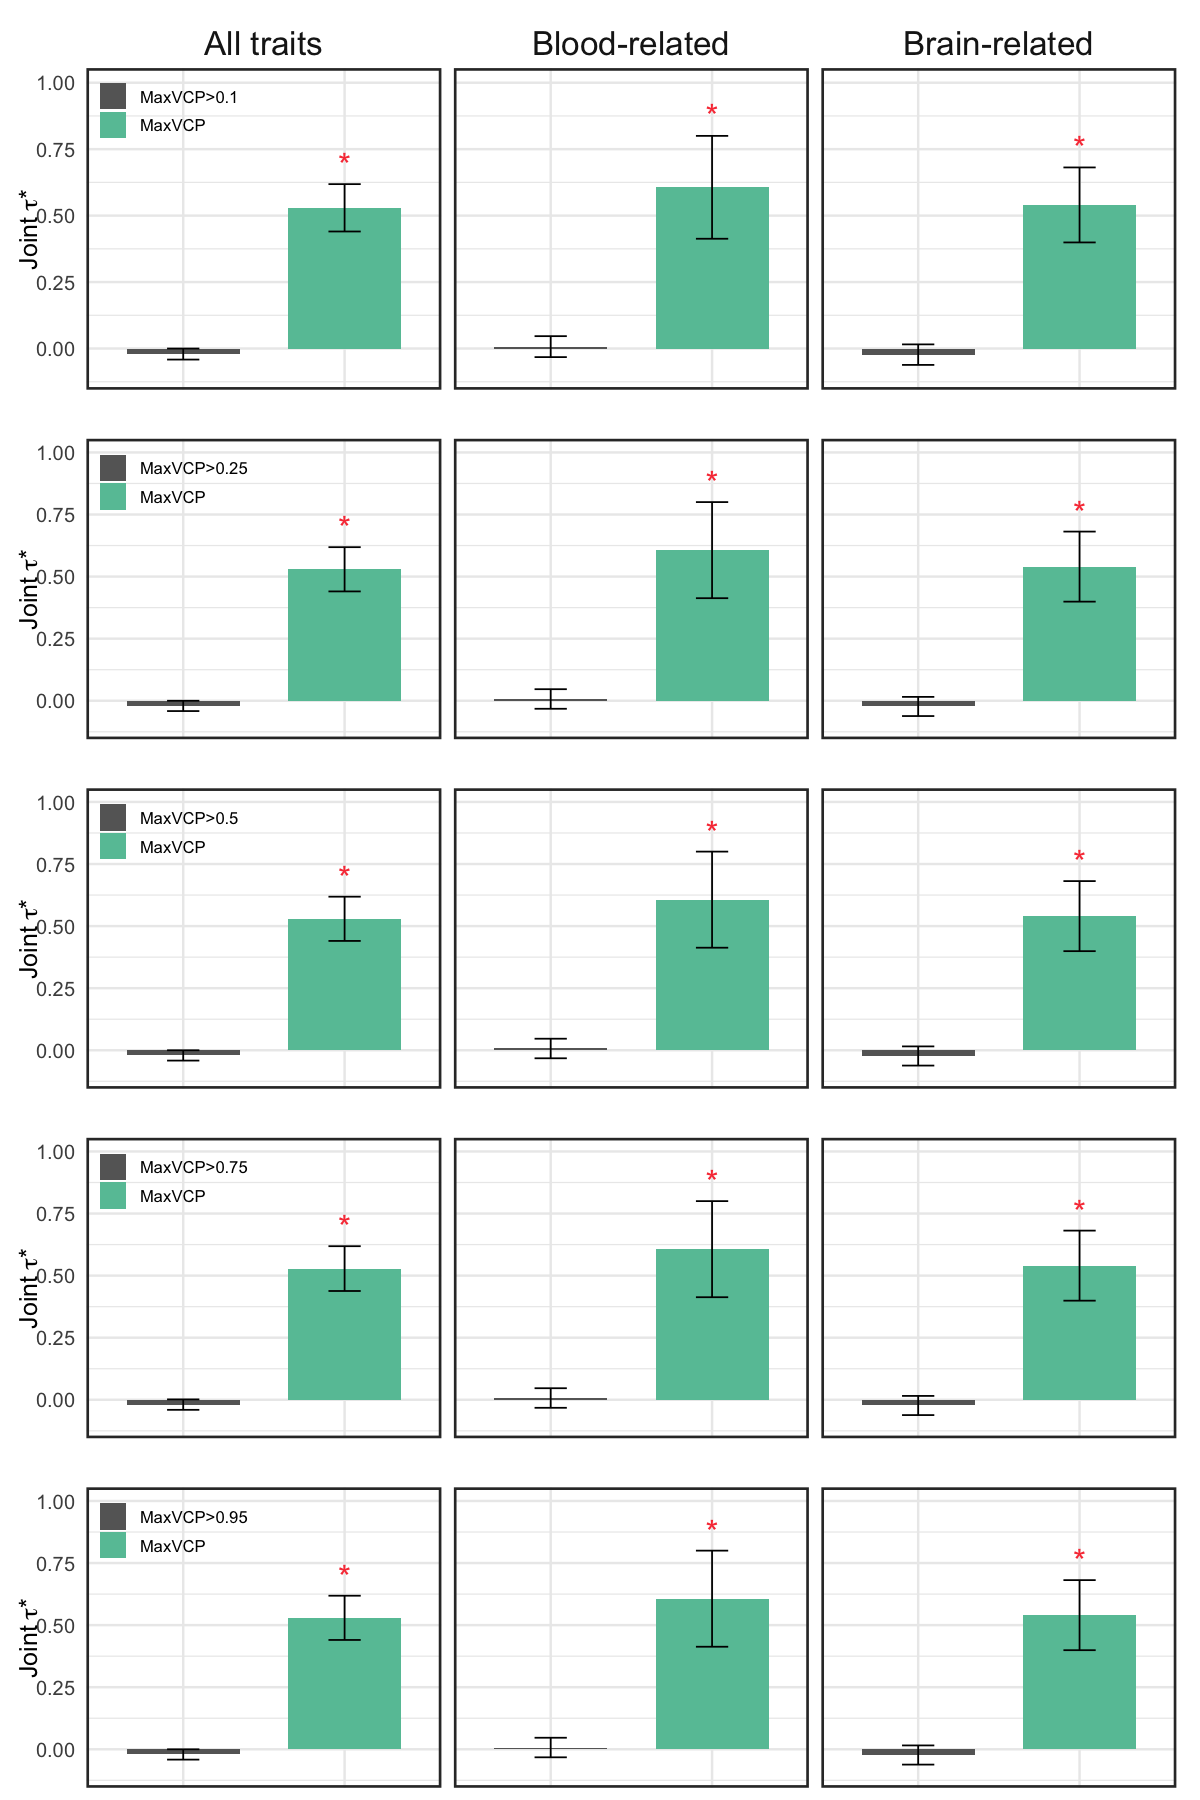

In [26]:
options(repr.plot.width = 10, repr.plot.height = 15)
library(ggpattern)
library(ggpubr)
library(cowplot)
final_plot <- plot_grid(p01, p025, p05, p075, p095,
                        ncol = 1, 
                        rel_heights = c(1.15,1,1,1,1))
final_plot

## Figure S10e
Heritability enrichment and standardized effect sizes (marginal $\tau^*$ and joint $\tau^*$) of MaxVCP-xQTL against MaxPIP annotation from SuSiE fine-mapping analysis.

In [32]:
data <- readRDS("Figure_S10e.rds")
ylim_values <- list(
  "marginal tau*" = c(-0.1, 1),
  "Enrichment" = c(-1, 20),
  "joint tau*" = c(-0.3, 1.2)
)
create_plot <- function(context){
  if (context == "marginal tau*") {
    y.show <- expression(paste("Marginal ", tau, "*"))
  } else if (context == "joint tau*") {
    y.show <- expression(paste("Joint ", tau, "*"))
  } else {
    y.show = context
  }
  p <- ggplot(data[data$Context == context, ], aes(x = Annotation, y = Value, fill = Annotation)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
    facet_wrap(~ Disease) +
    scale_fill_manual(values = c("MaxPIP (0.69%)" = color[2],
                                 "MaxVCP (0.14%)" = color[5])) +
    theme_minimal(base_size = 15) +
    labs(
      title = "",
      x = "",
      y = y.show,
      fill = "Annotation"
    ) +
    ylim(ylim_values[[context]])
  if (context == "marginal tau*") {
    p <- p + geom_text(data = subset(data, Context == "marginal tau*" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else if (context == "joint tau*") {
    p <- p + geom_text(data = subset(data, Context == "joint tau*" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else {
    p <- p + geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 0.7)  + 
      geom_text(data = subset(data, Context == "Enrichment" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  }
  if (context == "joint tau*"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -4)),
      legend.position = "inside",
      legend.justification = c(0, 1.05),
      legend.title = element_text(size = 0),
      legend.text = element_text(size = 10),
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else if (context == "Enrichment"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_text(size = 15),
      axis.text.x = element_blank(),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else {
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -4)),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  }
  return(p)
}
plot_single_tau <- create_plot("marginal tau*")
plot_enrichment <- create_plot("Enrichment")
plot_joint_tau <- create_plot("joint tau*")
pp = ggarrange(plot_enrichment, plot_single_tau, plot_joint_tau,
               ncol = 1, nrow = 3,
               heights = c(0.31, 0.27, 0.27))

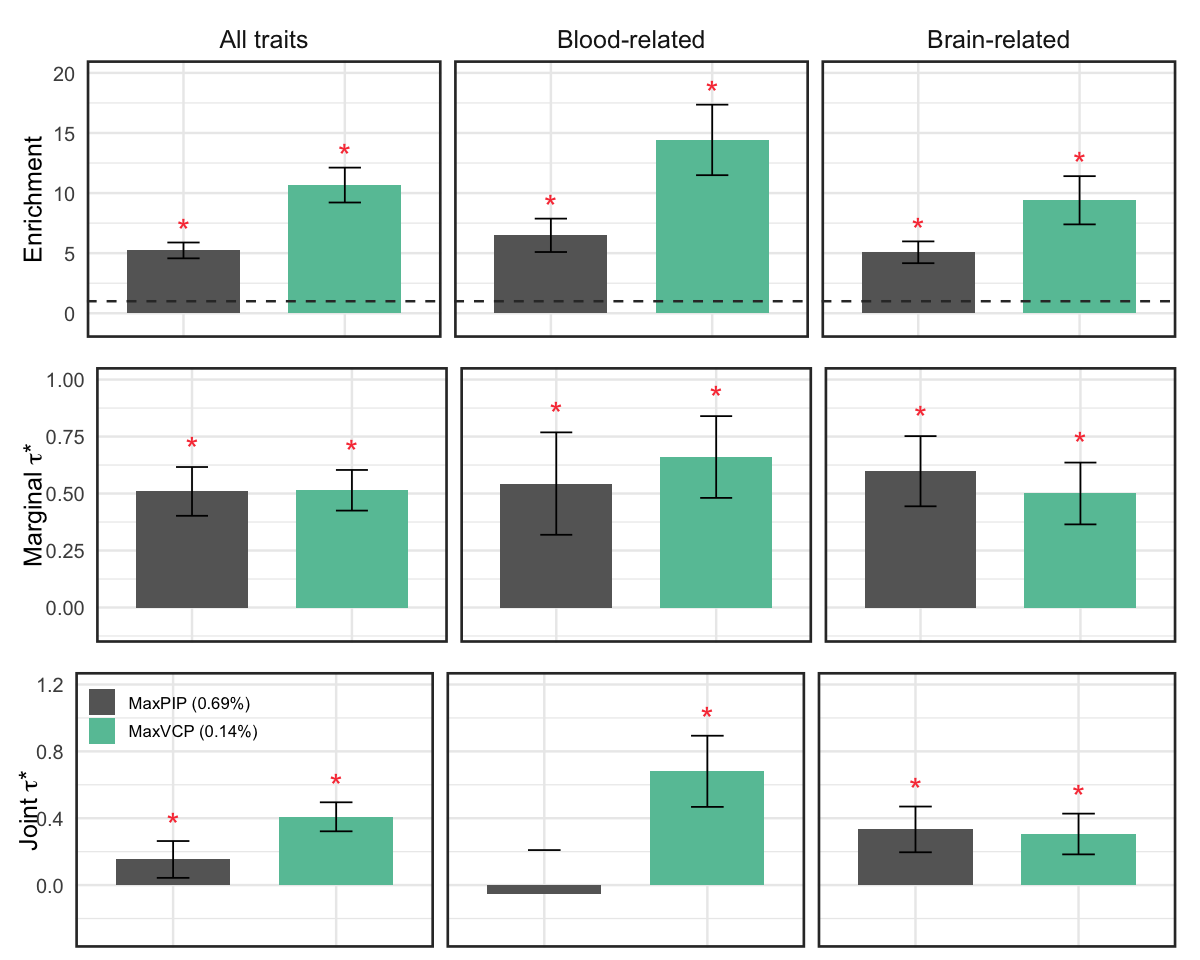

In [33]:
options(repr.plot.width = 10, repr.plot.height = 8)
pp

## Figure S10f
EOO analysis of MaxVCP-xQTL in the disease fine-mapped variants (PIP>0.95) from 94 UK Biobank traits and 930 Million Veteran Program (MVP) traits.

In [35]:
data <- readRDS("Figure_S10f.rds")
sdtimes <- 1.96
library(ggplot2)
library(ggsci)
p <- ggplot(data, aes(x = celltype, y = enrichment, fill = celltype)) +
  geom_bar(stat = "identity", width = 0.7, position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = enrichment - sdtimes*sd, ymax = enrichment + sdtimes*sd), width = 0.2, position = position_dodge(0.7), linewidth = 1) +
  geom_text(aes(label = "*", y = enrichment + sd * sdtimes + 0.03), vjust = 0, color = "#F94144", size = 7) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 1)  + 
  # scale_fill_brewer(palette = "Spectral", direction = -1) +
  scale_fill_jama() +
  labs(
    title = "",
    x = "",
    y = "Enrichment"
  ) +
  ylim(c(0,20)) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 0),
    axis.title.y = element_text(size = 24),
    axis.text.y = element_text(size = 20, margin = margin(r = 0), angle = 90, hjust = 0.5, vjust = 0),
    axis.text.x = element_text(size = 20, margin = margin(t = 0)),
    legend.position = "none",
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
  )

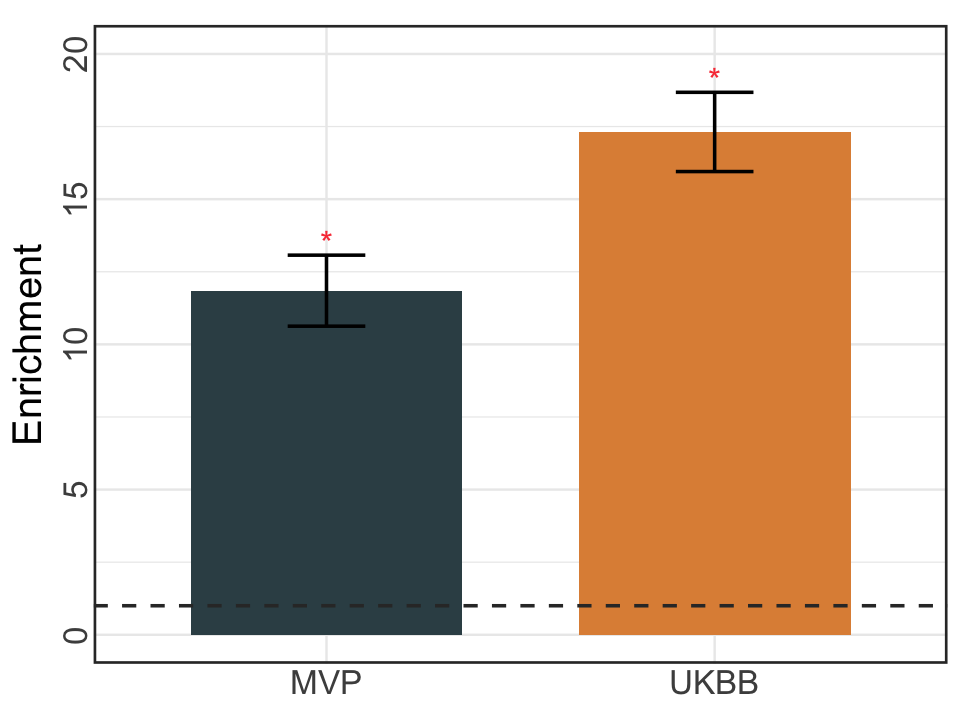

In [37]:
options(repr.plot.width = 8, repr.plot.height = 6)
p

## Figure S10g
Heritability enrichment and standardized effect sizes (marginal $\tau^*$ and joint $\tau^*$) of MaxVCP-xQTL annotations for cell‐type‐specific variants and cell‐type‐shared variants. Error bars denote 95% confidence intervals.

In [38]:
data <- readRDS("Figure_S10g.rds")
sd <- 1.96
# color <- c(pal_npg()(10), pal_d3()(10))
color <- c("#BDBDBD", "#969696", "#fc8d62", "#8da0cb", "#66c2a5")
ylim_values <- list(
  "marginal tau*" = c(-0.2, 1),
  "Enrichment" = c(-1, 22),
  "joint tau*" = c(-0.2, 1)
)

create_plot <- function(context){
  if (context == "marginal tau*") {
    y.show <- expression(paste("Marginal ", tau, "*"))
  } else if (context == "joint tau*") {
    y.show <- expression(paste("Joint ", tau, "*"))
  } else {
    y.show = context
  }
  p <- ggplot(data[data$Context == context, ], aes(x = Annotation, y = Value, fill = Annotation)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
    facet_wrap(~ Disease) +
    scale_fill_ucscgb() +
    theme_minimal(base_size = 15) +
    labs(
      title = "",
      x = "",
      y = y.show,
      fill = "Annotation"
    ) +
    ylim(ylim_values[[context]])
  if (context == "marginal tau*") {
    p <- p + geom_text(data = subset(data, Context == "marginal tau*" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else if (context == "joint tau*") {
    p <- p + geom_text(data = subset(data, Context == "joint tau*" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else {
    p <- p + geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 0.7)  + 
      geom_text(data = subset(data, Context == "Enrichment" & (P <= 0.05/2) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  }
  if (context == "joint tau*"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -4)),
      legend.position = "inside",
      legend.justification = c(0, 1.05),
      legend.title = element_text(size = 0),
      legend.text = element_text(size = 10),
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else if (context == "Enrichment"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_text(size = 15),
      axis.text.x = element_blank(),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else {
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -2)),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  }
  return(p)
}
plot_single_tau <- create_plot("marginal tau*")
plot_enrichment <- create_plot("Enrichment")
plot_joint_tau <- create_plot("joint tau*")

library(ggpubr)
pp = ggarrange(plot_enrichment, plot_single_tau, plot_joint_tau,
               ncol = 1, nrow = 3,
               heights = c(0.31, 0.27, 0.27))

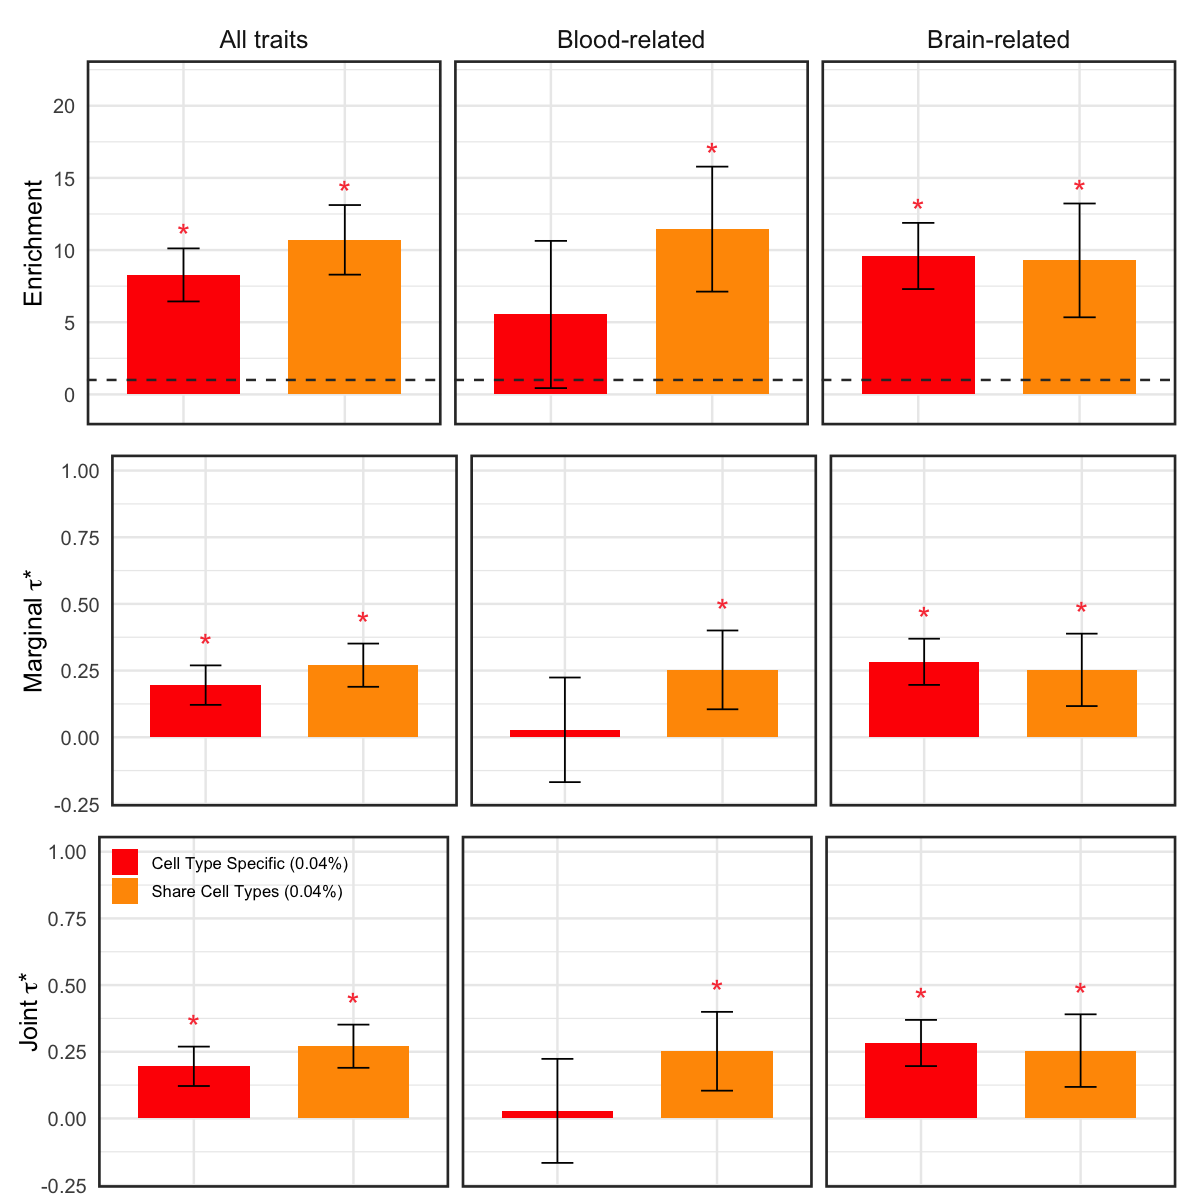

In [39]:
options(repr.plot.width = 10, repr.plot.height = 10)
pp